 # Introduction
 We are using Machine learning technique to determine the chances for getting heart diseaseU with features like age, bp and so forth.

In [200]:
# Import libraries and classes required for this example:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [201]:
#import file
df = pd.read_csv(r'C:\Users\kytan\Desktop\kidney_dataset\kidney_disease.csv')

# data frame info
print(df.shape)
# print(df.info())
print(df.columns) 
# df['bp'].unique()  # check bp categorical features


(400, 26)
Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [202]:
df = df.drop(['id'], axis=1)

In [203]:
# check distinct value
print(df.dtypes)

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


In [204]:
for i in df.columns:
    print('unique values in "{}":\n'.format(i),df[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "al":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "su":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "rbc":
 [nan 'normal' 'abnormal']
unique values in "pc":
 ['normal' 'abnormal' nan]
unique values in "pcc":
 ['notpresent' 'present' nan]
unique values in "ba":
 ['notpresent' 'present' nan]
unique values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79.

In [206]:
numColumns = ['rc','dm','cad','pcv','wc']

for i in numColumns:
    df[i] = df[i].str.replace('\t','')

In [207]:
numColumns = ['rc','dm','cad','pcv','wc']

for i in numColumns:
    df[i] = df[i].replace('?',np.mean(pd.to_numeric(df[i], errors='coerce')))

In [208]:
# checking null value
df.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [211]:
# filling na numerical value with forward filling
# df = df.fillna(method="ffill",limit=1)
# df = df.fillna(df.mean())
CategoricalColumns = ['bp','rbc','sg','pc','pcc','ba','pcv','wc','rc','htn','dm','cad','appet','pe','ane']

# select numeric columns
# numeric_columns = df.select_dtypes(include=['number']).columns
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer = imputer.fit(df[numeric_columns])
# imputer.transform(df[numeric_columns])

# # df.apply(lambda x: x.fillna(x.mean()),axis=0)
# df[CategoricalColumns] = df[CategoricalColumns].fillna(meanVal)

# for i in df.columns:
    # meanVal = int(df[i].mean())
    # df[i] = df[i].fillna(value = (df[i].mean()), inplace = True)
    # df[i].replace(' ', np.mean(pd.to_numeric(df[i], errors='coerce')))

In [212]:
imputer = SimpleImputer(missing_values=None, strategy='most_frequent')
CategoricalColumns = ['rbc','sg','pc','pcc','ba','pcv','wc','rc','htn','dm','cad','appet','pe','ane']

for columns in CategoricalColumns:
    imputer.fit_transform(df[columns].values.reshape(-1,1))[:,columns]

ValueError: Input contains NaN

In [ ]:
df.groupby('classification').mean()

C:\Users\kytan\AppData\Local\Temp\ipykernel_8436\2501411280.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('classification').mean()


,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
classification,,,,,,,,,,,,
ckd,124.427419,54.425000,79.705882,1.013937,1.721154,0.770732,175.523810,72.656170,4.430720,133.882530,4.883030,10.652217
ckd\t,133.500000,68.500000,70.000000,1.010000,2.000000,0.000000,164.500000,41.000000,2.550000,135.500000,4.500000,9.700000
notckd,324.500000,46.516779,71.351351,1.022414,0.000000,0.000000,107.722222,32.798611,0.868966,141.731034,4.337931,15.188194


In [ ]:
print(df['rbc'].unique())

onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(df.rbc.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["rbc_"+str(int(i)) for i in range(df.shape[1])]) 
df = pd.concat([df, dfOneHot], axis=1)

#droping the country column 
df= df.drop(['rbc'], axis=1) 
#printing to verify 
print(df.head())


['normal' 'abnormal']


ValueError: Shape of passed values is (158, 2), indices imply (158, 26)

In [ ]:
onehot_encoder = OneHotEncoder()
encoder_df = pd.DataFrame(onehot_encoder.fit_transform(df[['rbc']]).toarray())
#final_df = df.join(encoder_df)

encoder_df.columns = onehot_encoder.get_feature_names(['rbc'])

final_df= pd.concat([df, encoder_df ], axis=1)
print(final_df.head)

ValueError: input_features should have length equal to number of features (26), got 400

auto encode and name it with column name

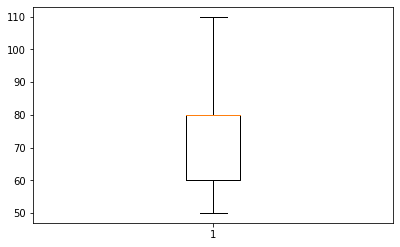

In [ ]:
# data visualisation

fig = plt.figure(figsize =(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(df['bp'])
plt.show()


fig = plt.figure(figsize =(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(df['bp'])
plt.show()

In [ ]:
# Split dataset into random train and test subsets:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 


print(X.shape, y.shape)
print(X_train[:5, :])
print(y_train[:5])

(158, 25) (158,)
[[299 73.0 60.0 1.02 0.0 0.0 'normal' 'normal' 'notpresent' 'notpresent'
  127.0 48.0 0.5 150.0 3.5 15.1 '52' '11000' '4.7' 'no' 'no' 'no' 'good'
  'no' 'no']
 [292 30.0 80.0 1.02 0.0 0.0 'normal' 'normal' 'notpresent' 'notpresent'
  89.0 42.0 0.5 139.0 5.0 16.7 '52' '10200' '5.0' 'no' 'no' 'no' 'good'
  'no' 'no']
 [352 37.0 60.0 1.02 0.0 0.0 'normal' 'normal' 'notpresent' 'notpresent'
  109.0 47.0 1.1 141.0 4.9 15.0 '48' '7000' '5.2' 'no' 'no' 'no' 'good'
  'no' 'no']
 [171 83.0 70.0 1.02 3.0 0.0 'normal' 'normal' 'notpresent' 'notpresent'
  102.0 60.0 2.6 115.0 5.7 8.7 '26' '12800' '3.1' 'yes' 'no' 'no' 'poor'
  'no' 'yes']
 [255 34.0 80.0 1.025 0.0 0.0 'normal' 'normal' 'notpresent' 'notpresent'
  121.0 27.0 1.2 144.0 3.9 13.6 '52' '9200' '6.3' 'no' 'no' 'no' 'good'
  'no' 'no']]
['notckd' 'notckd' 'notckd' 'ckd' 'notckd']


In [ ]:
# fit the model
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'normal'